In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [4]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
m = len(X)

In [5]:
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_X) * (Y[i] - mean_Y)
    denom += (X[i] - mean_X) **2
    d1 = numer/denom
    d0 = mean_Y - (d1 * mean_X)
print(d1, d0)

0.26342933948939945 325.57342104944223


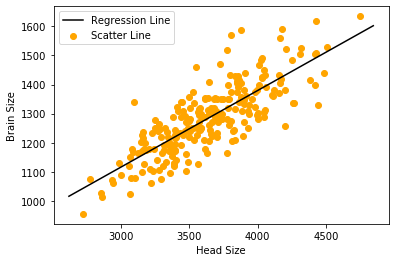

In [6]:
#ploting graph
max_X = np.max(X) + 100
min_X = np.min(X) - 100

x = np.linspace(min_X, max_X, 1000)
y = d0 + d1 * x

plt.scatter(X, Y, color = "orange", label = "Scatter Line")
plt.plot(x, y, color = "black", label = "Regression Line")

plt.xlabel("Head Size")
plt.ylabel("Brain Size")
plt.legend()
plt.show()


In [7]:
#To check how good is our model by using R^2 method
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = d0 + d1 * X[i]
    ss_t = (Y[i] - mean_Y) ** 2
    ss_r = (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6315648136958643


In [8]:
#from inbuilt lib scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((m, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)
Y_pred = reg.predict(X)
r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957
